In [1]:
import pandas as pd
import os, json, re
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import scipy.io as sio
from matplotlib import cm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [18]:
np.random.seed(42)

# Synthetic datasets

Colorcube (?)

### Random cube

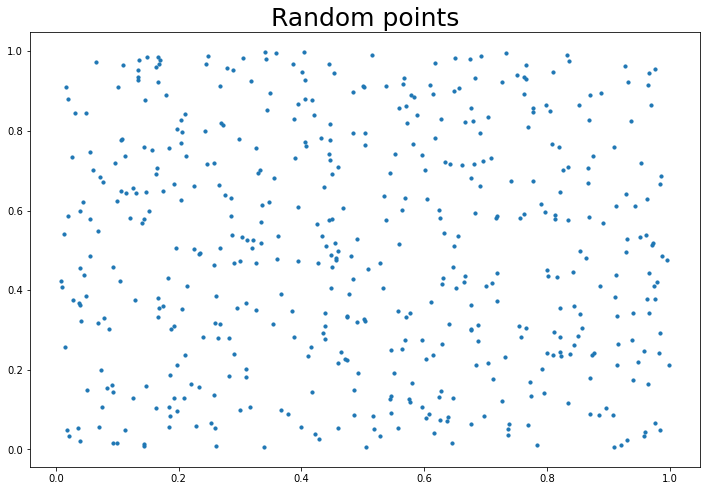

In [29]:
# data = np.random.rand(500, 2)
# x, y = zip(*data)
plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=10.0)
plt.title('Random points', fontsize=25)
np.save('data/RandomCube/prepared/train_data.npy', data)

### Torus

a $T^2$ embedded into 100-dimensional space.

In [78]:
from src.custom_shapes import torus

In [107]:
data, original = torus(n=6000, c=10, a=4, ambient=100, noise=0.05)

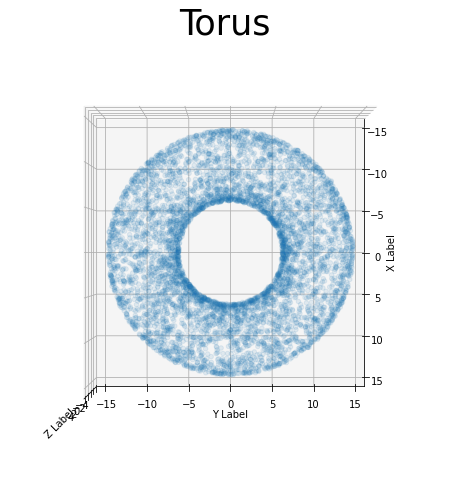

In [109]:
from IPython.display import clear_output

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
xs, ys, zs = zip(*original)
ax.scatter(xs, ys, zs, alpha=0.1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# for angle in range(0, 360):
#     clear_output(wait=True)
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)
#     plt.show()
ax.view_init(90, 0)
ax.set_title("Torus", fontsize=35)
plt.show()

In [81]:
test_ids = np.random.choice(np.arange(len(data)), size=1000, replace=False)
train_ids = np.asarray(list(set(np.arange(len(data))) - set(test_ids)))
train_data = data[train_ids]
test_data = data[test_ids]

np.save("data/Torus/prepared/train_data.npy", train_data)
np.save("data/Torus/prepared/test_data.npy", test_data)

### Infinity sign

A 2-dimensional figure $\infty$ embedded into 100-dimensional space.

In [117]:
from src.custom_shapes import infty_sign

In [118]:
data, original = infty_sign(n=1200, ambient=100, noise=0.05)

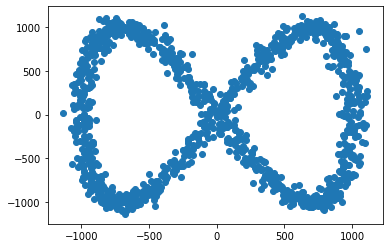

In [123]:
xs, ys = zip(*original)
plt.scatter(xs, ys)

In [120]:
test_ids = np.random.choice(np.arange(len(data)), size=200, replace=False)
train_ids = np.asarray(list(set(np.arange(len(data))) - set(test_ids)))
train_data = data[train_ids]
test_data = data[test_ids]

np.save("data/Infty/prepared/train_data.npy", train_data)
np.save("data/Infty/prepared/test_data.npy", test_data)

### Spheres

10 spheres enclosed by 1 large sphere. The intrinsic dimension is 100.

In [91]:
from src.spheres import create_sphere_dataset

In [104]:
# train test split
ids = []
for i, l in enumerate(np.unique(labels)):
    idx = np.random.choice(np.arange(0, 1000, dtype=np.uint), replace=False, size=250) + i*1000
    ids.append(idx)
test_ids = np.concatenate(ids)
test_data, test_labels = dataset[test_ids], labels[test_ids]
train_ids = np.asarray(list(set(np.arange(len(dataset))) - set(test_ids)))
train_data, train_labels = dataset[train_ids], labels[train_ids]

In [105]:
np.save('data/Spheres/prepared/train_data.npy', train_data)
np.save('data/Spheres/prepared/train_labels.npy', train_labels)
np.save('data/Spheres/prepared/test_data.npy', test_data)
np.save('data/Spheres/prepared/test_labels.npy', test_labels)

# dSprites

In [179]:
dataset_zip = np.load(
    'data/dSprites/dsprites-dataset/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', allow_pickle=True)

In [180]:
imgs = dataset_zip['imgs']
latents_values = dataset_zip['latents_values']
latents_classes = dataset_zip['latents_classes']
# metadata = dataset_zip['metadata'][()]

In [181]:
print(f"Image shape: {imgs[0].shape[0]} x {imgs[0].shape[1]}")
print(f"Color codes: {np.unique(latents_values[:, 0])}")
print(f"Shapes: {np.unique(latents_values[:, 1])}")
print(f"Scales: {np.unique(latents_values[:, 2])}")
print(f"Orientations: {np.unique(latents_values[:, 3])}")
print(f"X coordinates: {np.unique(latents_values[:, 4])}")
print(f"Y coordinates: {np.unique(latents_values[:, 5])}")

Image shape: 64 x 64
Color codes: [1.]
Shapes: [1. 2. 3.]
Scales: [0.5 0.6 0.7 0.8 0.9 1. ]
Orientations: [0.         0.16110732 0.32221463 0.48332195 0.64442926 0.80553658
 0.96664389 1.12775121 1.28885852 1.44996584 1.61107316 1.77218047
 1.93328779 2.0943951  2.25550242 2.41660973 2.57771705 2.73882436
 2.89993168 3.061039   3.22214631 3.38325363 3.54436094 3.70546826
 3.86657557 4.02768289 4.1887902  4.34989752 4.51100484 4.67211215
 4.83321947 4.99432678 5.1554341  5.31654141 5.47764873 5.63875604
 5.79986336 5.96097068 6.12207799 6.28318531]
X coordinates: [0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097 0.51612903 0.5483871
 0.58064516 0.61290323 0.64516129 0.67741935 0.70967742 0.74193548
 0.77419355 0.80645161 0.83870968 0.87096774 0.90322581 0.93548387
 0.96774194 1.        ]
Y coordinates: [0.         0.03225806 0.06451613 0.09677419 0.12903226 0.

In [182]:
# go only the edge of the image
condition = (latents_values[:, 4] == 1.) | (latents_values[:, 4] == 0.) | (latents_values[:, 5] == 0.) | (latents_values[:, 5] == 1.)
# only scale=1.0
condition &= (latents_values[:, 2] == 1.0)
print(np.sum(condition))
# only hearts
condition &= (latents_values[:, 1] == 1.0)
print(np.sum(condition))
# only one orientation
# condition &= (latents_values[:, 3] == 0) | (latents_values[:, 3] == 6.28318531)

14880
4960


Delete the **shape** and **scale**, the ideal embedding should be $T^2$

In [183]:
imgs = imgs[condition]

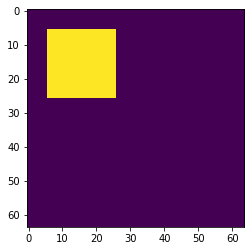

In [184]:
# example
plt.imshow(imgs[0])

In [185]:
len(imgs)

4960

In [186]:
angles = latents_values[condition][:, 3] / (np.pi)

In [187]:
np.save('data/dSprites/prepared/orientation.npy', angles)

In [240]:
xy = latents_values[condition][:, [4, 5]]

In [241]:
xy = (xy - 0.5)*2  # coordinate center is (0, 0), x,y in [-1, 1]^2
angles = np.arctan2(xy[:, 0], xy[:, 1])
angles[angles < 0] += 2*np.pi
angles /= np.pi

In [242]:
np.save('data/dSprites/prepared/coordinate.npy', angles) 

In [151]:
np.save('data/dSprites/prepared/train_data.npy', imgs)

# 3dCars

In [274]:
from tensorflow.compat.v1 import gfile
from sklearn.utils import extmath

In [276]:
class StateSpaceAtomIndex(object):
    """Index mapping from features to positions of state space atoms."""

    def __init__(self, factor_sizes, features):
        """Creates the StateSpaceAtomIndex.

        Args:
          factor_sizes: List of integers with the number of distinct values for each
            of the factors.
          features: Numpy matrix where each row contains a different factor
            configuration. The matrix needs to cover the whole state space.
        """
        self.factor_sizes = factor_sizes
        num_total_atoms = np.prod(self.factor_sizes)
        self.factor_bases = num_total_atoms / np.cumprod(self.factor_sizes)
        feature_state_space_index = self._features_to_state_space_index(features)
        if np.unique(feature_state_space_index).size != num_total_atoms:
            raise ValueError("Features matrix does not cover the whole state space.")
        lookup_table = np.zeros(num_total_atoms, dtype=np.int64)
        lookup_table[feature_state_space_index] = np.arange(num_total_atoms)
        self.state_space_to_save_space_index = lookup_table

    def features_to_index(self, features):
        """Returns the indices in the input space for given factor configurations.

        Args:
          features: Numpy matrix where each row contains a different factor
            configuration for which the indices in the input space should be
            returned.
        """
        state_space_index = self._features_to_state_space_index(features)
        return self.state_space_to_save_space_index[state_space_index]

    def _features_to_state_space_index(self, features):
        """Returns the indices in the atom space for given factor configurations.

        Args:
          features: Numpy matrix where each row contains a different factor
            configuration for which the indices in the atom space should be
            returned.
        """
        if (np.any(features > np.expand_dims(self.factor_sizes, 0)) or
            np.any(features < 0)):
            raise ValueError("Feature indices have to be within [0, factor_size-1]!")
        return np.array(np.dot(features, self.factor_bases), dtype=np.int64)

In [277]:
CARS3D_PATH = 'data/3DCars/data/cars/'

In [278]:
def _load_mesh(filename):
    """Parses a single source file and rescales contained images."""
    with gfile.Open(os.path.join(CARS3D_PATH, filename), "rb") as f:
        mesh = np.einsum("abcde->deabc", sio.loadmat(f)["im"])
    flattened_mesh = mesh.reshape((-1,) + mesh.shape[2:])
    rescaled_mesh = np.zeros((flattened_mesh.shape[0], 64, 64, 3))
    for i in range(flattened_mesh.shape[0]):
        pic = PIL.Image.fromarray(flattened_mesh[i, :, :, :])
        pic.thumbnail((64, 64), PIL.Image.ANTIALIAS)
        rescaled_mesh[i, :, :, :] = np.array(pic)
    return rescaled_mesh * 1. / 255

In [281]:
factor_sizes = [4, 24, 183]
features = extmath.cartesian(
    [np.array(list(range(i))) for i in factor_sizes])
latent_factor_indices = [0, 1, 2]
num_total_factors = features.shape[1]
index = StateSpaceAtomIndex(factor_sizes, features)

In [282]:
dataset = np.zeros((24 * 4 * 183, 64, 64, 3))
all_files = [x for x in gfile.ListDirectory(CARS3D_PATH) if ".mat" in x]
for i, filename in enumerate(all_files):
    data_mesh = _load_mesh(filename)
    factor1 = np.array(list(range(4)))
    factor2 = np.array(list(range(24)))
    all_factors = np.transpose([
          np.tile(factor1, len(factor2)),
          np.repeat(factor2, len(factor1)),
          np.tile(i,
                  len(factor1) * len(factor2))
    ])
    indexes = index.features_to_index(all_factors)
    dataset[indexes] = data_mesh

In [302]:
dataset.shape

(17568, 64, 64, 3)

In [307]:
np.save("data/3DCars/prepared/features.npy", features)
np.save("data/3DCars/prepared/train_data.npy", dataset)

# Pen digits

## Description

Greyscale 8x8 pictures of drawn digits.

7494 train pictures, 3498 test pictures

In [77]:
data = pd.read_csv('data/pendigits/pendigits_sta8_train.csv', header=None, names=[f'pix{i}' for i in range(64)])
label = pd.read_csv('data/pendigits/pendigits_label_train.csv', header=None, names=['label'])

In [78]:
data.shape

(7494, 64)

In [51]:
# demonstration
Image.fromarray(np.invert(np.uint8(data.values.reshape((-1, 8, 8))[0])*255))

In [52]:
data['label'] = label['label']

In [53]:
data.to_csv('data/pendigits/prepared/train.csv', index=False)

In [75]:
data = pd.read_csv('data/pendigits/pendigits_sta8_test.csv', header=None, names=[f'pix{i}' for i in range(64)])
label = pd.read_csv('data/pendigits/pendigits_label_test.csv', header=None, names=['label'])

In [76]:
data.shape

(3498, 64)

In [55]:
data['label'] = label['label']
data.to_csv('data/pendigits/prepared/test.csv', index=False)

# COIL-20

COIL-20 is a set of 1440 greyscale images consisting of 20 objects under 72 different rotations spanning 360 degrees. Each image is a 128x128
image which we treat as a single 16384 dimensional vector for the purposes
of computing distance between images.

In [41]:
filenames = os.listdir("data/COIL-20/coil-20-proc/")
dirname = "data/COIL-20/coil-20-proc/"

labels = []
data = []
for file in tqdm(filenames):
    img = Image.open(dirname + file)
    objId, imgId = file.split('__')
    imgId = int(imgId[:-4])
    objId = int(objId[3:])
    data.append(np.array(img))
    labels.append(objId)
data = np.asarray(data)
labels = np.asarray(labels)

  0%|          | 0/1440 [00:00<?, ?it/s]

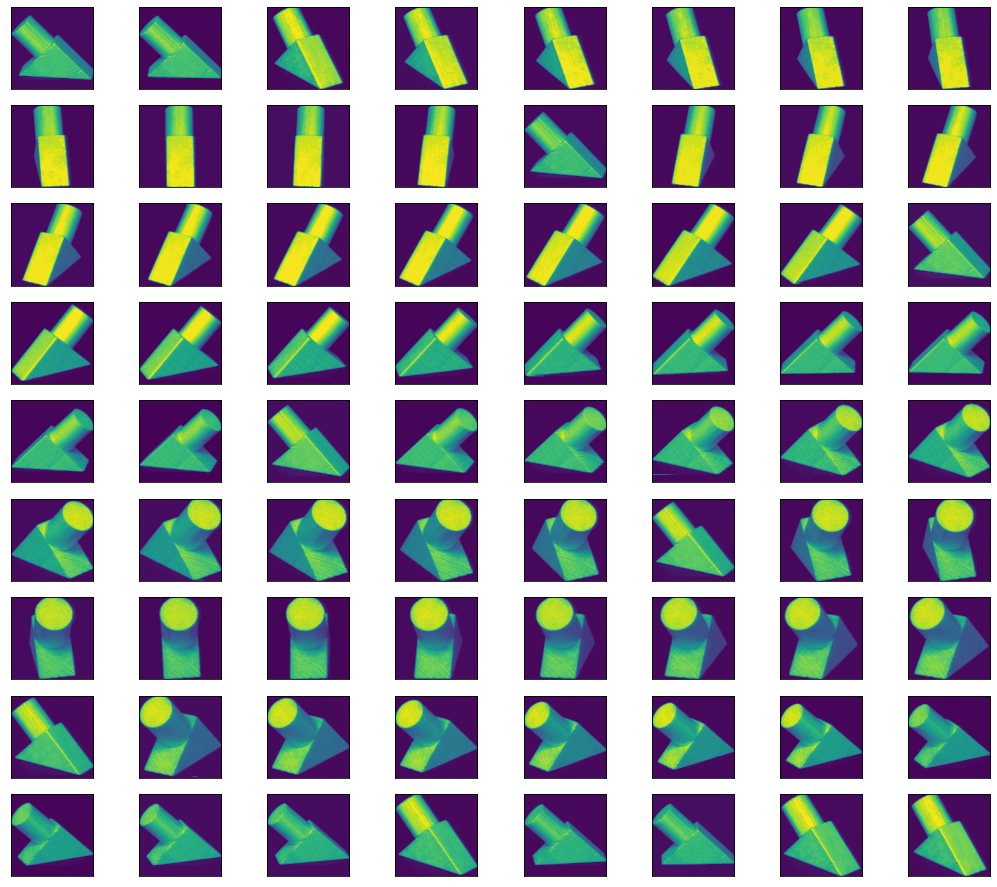

In [54]:
objId = 2
fig, axes = plt.subplots(9, 8, figsize=(2*9, 2*8))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(data[labels==objId][i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [55]:
img.shape

(128, 128)

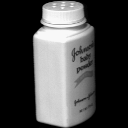

In [31]:
# demonstration
img.show()

In [59]:
np.save('data/COIL-20/prepared/data.npy', data)
np.save('data/COIL-20/prepared/labels.npy', labels)

# COIL-100

COIL-100 is a set of 7200 colour images consisting of 100 objects under 72 different rotations spanning 360 degrees. Each image consists of 3 128x128 intensity matrices (one for each color channel). We treat this as a single 49152 dimensional vector for the purposes of computing distance between images.

In [113]:
dirname = "data/COIL-100/images/"
filenames = os.listdir(dirname)

In [119]:
labels = []
data = []
for file in tqdm(filenames):
    if re.match("obj[]+__[0-9]+\.png", file) is None:
        continue
    img = Image.open(dirname + file)
    objId, imgId = file.split('__')
    imgId = int(imgId[:-4])
    objId = int(objId[3:])
    data.append(np.array(img))
    labels.append([objId, imgId])
data = np.asarray(data)
labels = np.asarray(labels)

  0%|          | 0/7202 [00:00<?, ?it/s]

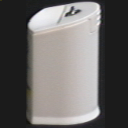

In [120]:
img.show()

In [121]:
np.save('data/COIL-100/prepared/data.npy', data)
np.save('data/COIL-100/prepared/labels.npy', labels)

# Mouse scRNA-seq

Mouse scRNA-seq is profiled gene expression data for 20,921 cells
from an adult mouse. Each sample consists of a vector of 26,774 measurements.

URL:  https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE93374

In [15]:
!ls data/scRNA/MouseRNA/

GSE93374_Merged_all_020816_BatchCorrected_LNtransformed_doubletsremoved_Data.txt.gz
GSE93374_Merged_all_020816_DGE.txt.gz
GSE93374_cell_metadata.txt.gz


# Shuttle

Statlog (Shuttle) is a NASA dataset consisting of various data associated to the positions of radiators in the space shuttlle, including a timestamp.

The dataset has 58000 points in a 9 dimensional feature space.

THIS DATASET SHOULD BE TACKLED BY TRAIN/TEST.


NUMBER OF EXAMPLES
 - training set     43500
 - test set         14500

NUMBER OF ATTRIBUTES: 9

The shuttle dataset contains 9 attributes all of which are numerical.
The first one being time.  The last column is the class which has been 
coded as follows :
1.       Rad Flow
2.       Fpv Close
3.       Fpv Open
4.       High
5.       Bypass
6.       Bpv Close
7.       Bpv Open
        
Approximately 80% of the data belongs to class 1. Therefore the default 
accuracy is about 80%. The aim here is to obtain an accuracy of 
99 - 99.9%.        


Validation set:

The examples in the original dataset were in time order, and this time order
could presumably be relevant in classification.   However, this was not deemed
relevant for StatLog purposes, so the order of the examples
 in the original dataset was randomised, and 
a portion of the original dataset removed for validation purposes.

In [9]:
data = []
with open('data/Shuttle/shuttle.trn') as fp:
    lines = fp.readlines()
data = [[int(t) for t in line.strip().split(' ')] for line in lines]
data = np.asarray(data)

labels = data[:, -1]
data = data[:, :-1]

np.save('data/Shuttle/prepared/train_data.npy', data)
np.save('data/Shuttle/prepared/train_labels.npy', labels)

In [10]:
data = []
with open('data/Shuttle/shuttle.tst') as fp:
    lines = fp.readlines()
data = [[int(t) for t in line.strip().split(' ')] for line in lines]
data = np.asarray(data)

labels = data[:, -1]
data = data[:, :-1]

np.save('data/Shuttle/prepared/test_data.npy', data)
np.save('data/Shuttle/prepared/test_labels.npy', labels)

# MNIST

In [162]:
import gzip
f = gzip.open('data/MNIST/train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 60000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size)

f = gzip.open('data/MNIST/train-labels-idx1-ubyte.gz','r')
f.read(8)
labels = []
for i in range(num_images):   
    buf = f.read(1)
    labels.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64)[0])
labels = np.array(labels)

In [181]:
np.save('data/MNIST/prepared/train_data.npy', data)
np.save('data/MNIST/prepared/train_labels.npy', labels)

In [177]:
# demonstration
Image.fromarray(data[0].astype(np.uint8))

In [188]:
import gzip
f = gzip.open('data/MNIST/t10k-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 10000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size)

f = gzip.open('data/MNIST/t10k-labels-idx1-ubyte.gz','r')
f.read(8)
labels = []
for i in range(num_images):   
    buf = f.read(1)
    labels.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64)[0])
labels = np.array(labels)

In [189]:
np.save('data/MNIST/prepared/test_data.npy', data)
np.save('data/MNIST/prepared/test_labels.npy', labels)

# F-MNIST

In [190]:
import gzip
f = gzip.open('data/F-MNIST/train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 60000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size)

f = gzip.open('data/F-MNIST/train-labels-idx1-ubyte.gz','r')
f.read(8)
labels = []
for i in range(num_images):   
    buf = f.read(1)
    labels.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64)[0])
labels = np.array(labels)

In [191]:
# demonstration
Image.fromarray(data[0].astype(np.uint8))

In [192]:
np.save('data/F-MNIST/prepared/train_data.npy', data)
np.save('data/F-MNIST/prepared/train_labels.npy', labels)

In [194]:
f = gzip.open('data/F-MNIST/t10k-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 10000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size)

f = gzip.open('data/F-MNIST/t10k-labels-idx1-ubyte.gz','r')
f.read(8)
labels = []
for i in range(num_images):   
    buf = f.read(1)
    labels.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64)[0])
labels = np.array(labels)

In [195]:
np.save('data/F-MNIST/prepared/test_data.npy', data)
np.save('data/F-MNIST/prepared/test_labels.npy', labels)

# Flow

Flow cytometry is a dataset of flow cytometry measurements of
CDT4 cells comprised of 1,000,000 samples, each with 17 measurements. (?)

In [208]:
with open('data/Flow/flow-cytometry-40k.txt') as fp:
    data = [[float(t) for t in line.strip().split(' ')] for line in fp.readlines()]
data = np.asarray(data)

In [220]:
np.save('data/Flow/prepared/data.npy', data[:, 1:])

In [12]:
np.load("data/Flow/prepared/data.npy").shape

(40000, 5)

In [13]:
!ls data/

flow-cytometry-40k.txt	flow-cytometry-40k.txt.gz  prepared


# GoogleNews word vectors

# Stanford 3D models

In [12]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
mesh = trimesh.load_mesh('data/Stanford3D/meshes/bunny/reconstruction/bun_zipper.ply')

In [3]:
mesh.show()

/workspace/topological_autoencoders/.env/lib/python3.6/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [4]:
scene = mesh.scene()

In [5]:
camera_start, _ = scene.graph[scene.camera.name]

In [68]:
angle = np.radians(3.0)
# rotate_y = trimesh.transformations.rotation_matrix(angle=angle, direction=[0, 1, 0], point=scene.centroid)

In [69]:
round((2*np.pi / angle)**2)

14400

In [21]:
round(2 * np.pi / angle)

120

In [8]:
print(f"Number of samples: {2*(int(np.pi / angle))**2}")

Number of samples: 6962


In [10]:
for i in range(int(2*np.pi/angle)):
    trimesh.constants.log.info('Saving image %d', i)

    # rotate the camera view transform
    camera_old, _ = scene.graph[scene.camera.name]
    camera_new = np.dot(rotate_y, camera_old)

    # apply the new transform
    scene.graph[scene.camera.name] = camera_new

    # saving an image requires an opengl context, so if -nw
    # is passed don't save the image
    # increment the file name
    file_name = 'data/Stanford3D/meshes/bunny/render_' + str(i) + '.png'
    # save a render of the object as a png
    png = scene.save_image(resolution=[64, 64], visible=True)
    with open(file_name, 'wb') as f:
        f.write(png)
        f.close()

NoSuchDisplayException: Cannot connect to "None"

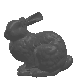

In [99]:
Image.open('data/Stanford3D/meshes/bunny/images/render_a45.0_0_0.png')

In [61]:
80*80

6400

In [71]:
!tar -xvf data/Stanford3D/meshes/dragon_recon.tar.gz

dragon_recon/
dragon_recon/README
dragon_recon/dragon_vrip.ply
dragon_recon/dragon_vrip_res2.ply
dragon_recon/dragon_vrip_res3.ply
dragon_recon/dragon_vrip_res4.ply


Command to run images:

    xvfb-run -s "-screen 0 1400x900x24" python3 generate_images.py ./meshes/bunny/reconstruction/bun_zipper.ply ./meshes/bunny/images --resolution 80 --angle 3.0

# Mammoth

In [100]:
import json

In [101]:
data = json.load(open('data/Mammoth/understanding-umap/raw_data/mammoth_3d_50k.json'))

In [103]:
labels = json.load(open('data/Mammoth/understanding-umap/public/mammoth_10k_encoded.json'))

In [108]:
data = np.array(data)

In [110]:
data.shape

(50000, 3)